In [4]:
import pandas as pd
from tqdm import tqdm
import errant
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./data/data_corrected.csv')
df.head(5)

,Unnamed: 0,original,corrected,native
0,0,I'm looking for a language exchange to improve...,I'm looking for a language exchange to improve...,Spanish<br/>Catalan
1,1,I am from Barcelona and I speak Spanish and Ca...,"I am from Barcelona, and I speak Spanish and C...",Spanish<br/>Catalan
2,2,"Hey, I'm interested in improving my English (I...","Hey, I'm interested in improving my English (I...",Spanish
3,3,"Hi, I'm trying to improve my english conversat...","Hi, I'm trying to improve my English conversat...",Spanish
4,4,I am Spanish but I have lived in France for 20...,"I am Spanish, but I have lived in France for 2...",Spanish


In [7]:
French = df[df['native'].str.contains('French')]
print("French: ", len(French))
Spanish = df[df['native'].str.contains('Spanish')]
print("Spanish:", len(Spanish))
Italian = df[df['native'].str.contains('Italian')]
print("Italian:", len(Italian))

languages = {'French': French, 'Spanish': Spanish, 'Italian': Italian}

French:  394
Spanish: 986
Italian: 522


In [68]:
# setup errant annotator
nlp = spacy.load('en_core_web_sm')
annotator = errant.load('en', nlp)

def types_and_frequencies(language, df):
    error_types = []
    for i in tqdm(range(len(df))):
        temp_data = df.iloc[i]
        orig = annotator.parse(temp_data['original'])
        cor = annotator.parse(temp_data['corrected'])
        edits = annotator.annotate(orig, cor)
        for e in edits:
            error_types.append(e.type)

    error_df = pd.DataFrame(columns = ['type'], data=error_types)
    value_counts = error_df.value_counts(normalize=True)
    freq = pd.DataFrame(value_counts)
    freq = freq.reset_index()
    freq['native'] = language
    return freq

In [69]:
total_df = pd.DataFrame()
for language in ["French","Spanish","Italian"]:
    df_subset = df[df['native'].str.contains(language)]
    freqs = types_and_frequencies(language, df_subset)
    total_df = pd.concat( [total_df, freqs], ignore_index=True)

100%|████████████████████████████████████████████████████████████████████████████████| 522/522 [00:11<00:00, 45.18it/s]


In [70]:
print(total.columns)
total = total.sort_values(['type','native'], ascending=False)

Index(['type', 'proportion', 'native'], dtype='object')


C:\Users\thoma\anaconda3\envs\gram\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thoma\anaconda3\envs\gram\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thoma\anaconda3\envs\gram\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thoma\anaconda3\envs\gram\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

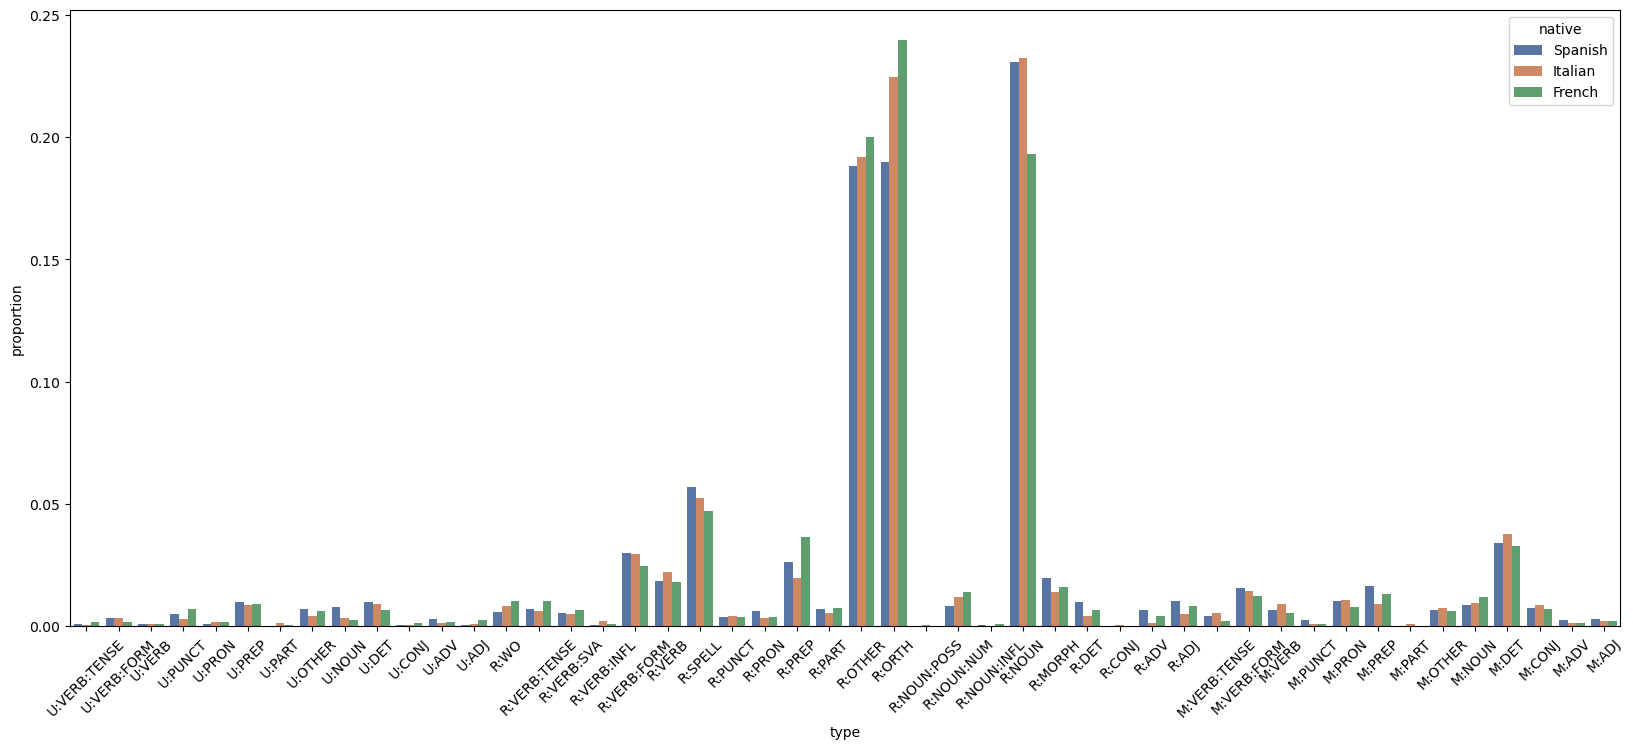

In [71]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
pl = sns.barplot(
    data=total,
    x="type", y="proportion", hue="native",
    palette="deep"
)
plt.savefig('./plots/latin_comparison.png')
plt.show()